# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I ****, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

---


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [8]:
#importing the required libraries
#!pip install wordCloud
# Libraries for data loading, data manipulation and data visulisation
import numpy as np                     
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Customise our plotting settings
sns.set_style('whitegrid')

#Libraries for data cleaning and preprocessing
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.utils import resample
import string
import re
import pickle
import nltk
import string

#Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score # Classification report

In [9]:
nltk.download()
nltk.download('omw-1.4')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package omw-1.4 to C:\Users\Pythom
[nltk_data]     Program\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
conda install -c conda-forge wordcloud


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: wordcloud


 <a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

We frist start by loading in our dataset, both the `training` and `testing` dataset are loaded as a pandas dataframe

In [11]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

**Exploratory Data Analysis (EDA) :**  After loading in our dataset, we first begin with the vital component which is the **EDA**, to better understand the dataset we are working with and to gain insight about the `features` and `labels` by performing `Univariate` or `Multivariate` , `Non-graphical` or `Graphical` Analysis"

We will take a quick look at the first few rows of the `training` and `testing` dataset to have an overview of our features and labels (using `pd.head()` method)

In [13]:
#The first five rows of the traing dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


After taking a look at the frist five  rows of the dataframe we can see that we have `Three (3)` columns in the dataFrame.

We have two features and one label

features inludes:

    - message
    - tweetid

label:

    - sentiment
    
And the test dataFrame contains only the features

In [14]:
#The first five rows of the test dataset
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


We will take a look at the shape of the dataframe to see the amount of data we are working with, the **rows** and the **columns**

In [15]:
#checking the shape of the training dataframe
train.shape
print("The training dataset has {0} rows and {1} columns".format(train.shape[0], train.shape[1]))

The training dataset has 15819 rows and 3 columns


looking at the shape of the dataframe we have `15819` rows and `3` columns

Next up let's take a look at the data types in the dataframe using `pd.info()` to get more information about the dataframe

In [16]:
#checking the information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


looking at the above output we can see that we have two `int64` and one `object` 

In [17]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

well it shows that we have **0** null values in the training data, which means we don't have any null values

let's take a closer look on our label `sentiment` 

In [18]:
#checking for unique values 
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Well it looks like we have 4 unique values in the label.

Based on the description of the data, here is what each value stands for:

    1 Pro: the tweet supports the belief of man-made climate change
    2 News: the tweet links to factual news about climate change
    0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
    -1 Anti: the tweet does not believe in man-made climate change

let's count and plot the distribution of each unique value

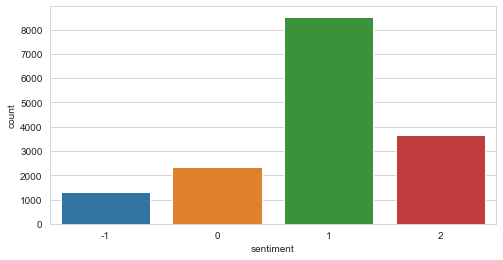

In [19]:
#ploting the distribution of unique label values
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="sentiment", data=train)
plt.show()

**Interpretation**

- The above plot comfirms that:

`1296` tweets do not believe in man-made climate change `-1`

`2353` tweets neither supports nor refutes the belief of man-made climate change `0`

`8530` Pro: the tweet supports the belief of man-made climate change `1`

`3640` News: the tweet links to factual news about climate change `2`

The plot shows that the highest proportion of the tweets supports the belief of man-made climate change

**Note:** here the label data appears to be `unbalanced` and it's important to have a balanced label distribution to get a better performing model.

Now moving on let's explore our `features` to gain more insight  

In [24]:
train.skew()

sentiment   -0.683959
tweetid     -0.008471
dtype: float64

In [27]:
train.kurtosis()

sentiment    0.122976
tweetid     -1.193356
dtype: float64

In [34]:
train.corr()

,sentiment,tweetid
sentiment,1.000000,-0.003758
tweetid,-0.003758,1.000000


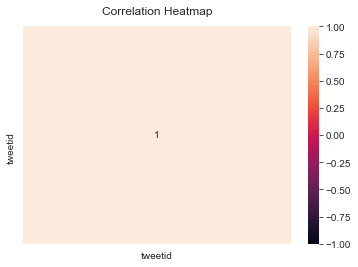

In [35]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [37]:
#checking the tweetid to see if there are any duplicate id's
train['tweetid'].nunique()

15819

In [38]:
train['tweetid'].duplicated().sum()

0

Okay it looks like we don't have any duplicate value from the `tweetid`column

Moving on let's take a closer look into the `message` column which contains the tweets

In [39]:
#taking a colser look on the message column
train['message']

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

Well based on what we are seeing from the `message` column which contains the tweets, it shows the presence of some unwanted characters which may prove to be redundant when building our model.

In [41]:
#creating a new dataframe for the features
df = pd.DataFrame(train[['tweetid', 'message']])

In [42]:
#install the wordcloud package using pip
!pip install WordCloud

**WordCloud Visualization**

We will create a wordcloud to see the high frequency tokens for all the sentiment

(-0.5, 399.5, 199.5, -0.5)

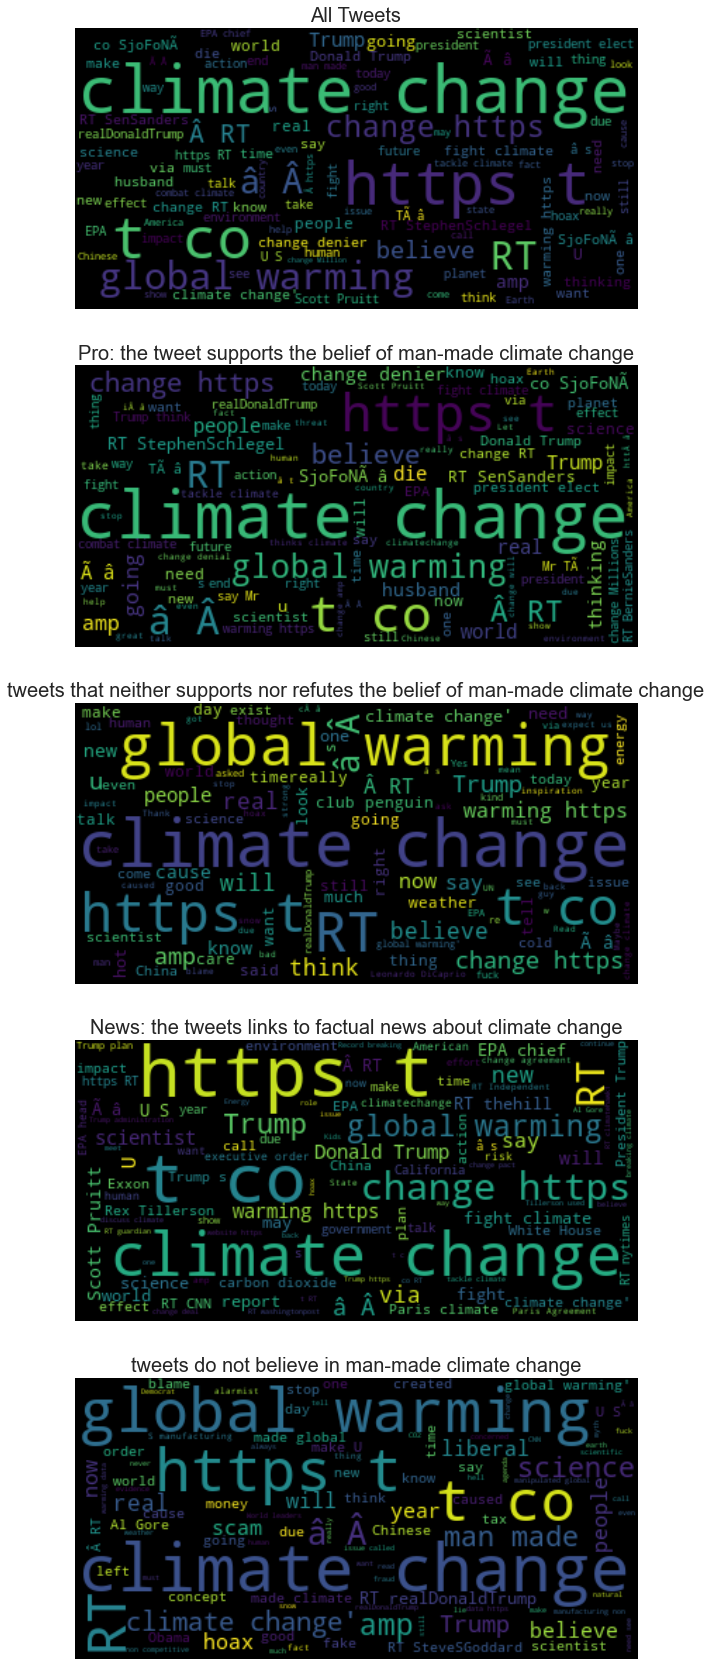

In [43]:
# Start with one review:
#classifying the tweets into it's category class
df_PRO = train[train['sentiment']==1]
df_NSR = train[train['sentiment']==0]
df_NEWS = train[train['sentiment']==2]
df_NPRO = train[train['sentiment']==-1]

#looping through each category of the tweet and joining it as a string
tweet_All = " ".join(review for review in df.message)
tweet_PRO = " ".join(review for review in df_PRO.message)
tweet_NSR = " ".join(review for review in df_NSR.message)
tweet_NEWS = " ".join(review for review in df_NEWS.message)
tweet_NPRO = " ".join(review for review in df_NPRO.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
wordcloud_PRO = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_PRO)
wordcloud_NSR = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NSR)
wordcloud_NEWS = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NEWS)
wordcloud_NPRO = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_NPRO)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_PRO, interpolation='bilinear')
ax[1].set_title('Pro: the tweet supports the belief of man-made climate change',fontsize=20)
ax[1].axis('off')
ax[2].imshow(wordcloud_NSR, interpolation='bilinear')
ax[2].set_title('tweets that neither supports nor refutes the belief of man-made climate change',fontsize=20)
ax[2].axis('off')
ax[3].imshow(wordcloud_NEWS, interpolation='bilinear')
ax[3].set_title('News: the tweets links to factual news about climate change',fontsize=20)
ax[3].axis('off')
ax[4].imshow(wordcloud_NPRO, interpolation='bilinear')
ax[4].set_title('tweets do not believe in man-made climate change',fontsize=20)
ax[4].axis('off')

Taking a look at the above wordcloud, we can see a considerable amount of  frequently appearing tokens such as:
`Climate change`and `global warming` in all the cartegories of the tweets and we can see lots of `http` which suggests that cleaning of the data is highly recommended.

### Next step is Data cleaning

Before applying any Machine Learning model to a dataset, we need to first take a look at our data to see if it is in the right state that we want it to be and if further cleaning of the data set will be required. well in  our case, the data set will be preprocessed before being fit to any machine learning model.

**Pre-processing text data**

we will be cleaning our data with following steps below.

- Remove punctuation Marks
- Tokenization - Converting a sentence into list of words
- Remove stopwords - a list of frequently appearing english words in sentences
- Lammetization/stemming - Tranforming any form of a word to its root word

In [44]:
# Remove Punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
#Data preprocessing
#function that handles the removal punctuations from the tweets
def remove_punct(text):
    """
    the function remove_punction, it takes in a text as input and loops through
    the text, if a character is not in string.punctuation then it adds the character
    as a string to the text variable
    
    """
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [46]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message_punct'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [47]:
#apply the remve_puct func to the tweets column
df['message_punct'] = df['message_punct'].apply(lambda x: remove_punct(x))
df.head()

,tweetid,message,message_punct
0,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesnt think carbon dio...
1,126103,It's not like we lack evidence of anthropogeni...,Its not like we lack evidence of anthropogenic...
2,698562,RT @RawStory: Researchers say we have three ye...,RT RawStory Researchers say we have three year...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,TodayinMaker WIRED was a pivotal year in the...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",RT SoyNovioDeTodas Its and a racist sexist cl...


In [48]:
# Data cleaning 
def clean_data(texts):
    
    """
    clean_data(text), the function further cleans the data using (re)
    by removing extract white spaces and non text characters
    
    """
    words = list()
    for text in texts.split():
        # remove non text character from start and end of string
        text = re.sub(r'(^\W+|\W+$)','',text)
#       #remove multiple white spaces
        text = re.sub(r'\s+','',text)
#       #remove non text characters and emojis between texts
        text = re.sub(r'\W+',r'',text)
#       #remove white space at the end of strings
        text = re.sub(r'\s+$',r'',text)
#       #Remove unwanted symbols
        text = re.sub(r'[#,@,$_,?*//""]',r'',text)
        words.append(text.lower())
            
        text = [i for i in words if len(i) >= 2]

    return " ".join(text)

In [49]:
#applying the clean_data function
df['tweets'] = df['message_punct'].apply(clean_data)

In [52]:
df.head()

,tweetid,message,message_punct,tweets
0,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,126103,It's not like we lack evidence of anthropogeni...,Its not like we lack evidence of anthropogenic...,its not like we lack evidence of anthropogenic...
2,698562,RT @RawStory: Researchers say we have three ye...,RT RawStory Researchers say we have three year...,rt rawstory researchers say we have three year...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,TodayinMaker WIRED was a pivotal year in the...,todayinmaker wired was pivotal year in the war...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",RT SoyNovioDeTodas Its and a racist sexist cl...,rt soynoviodetodas its and racist sexist clima...


Word Cloud on the cleaned data set

(-0.5, 399.5, 199.5, -0.5)

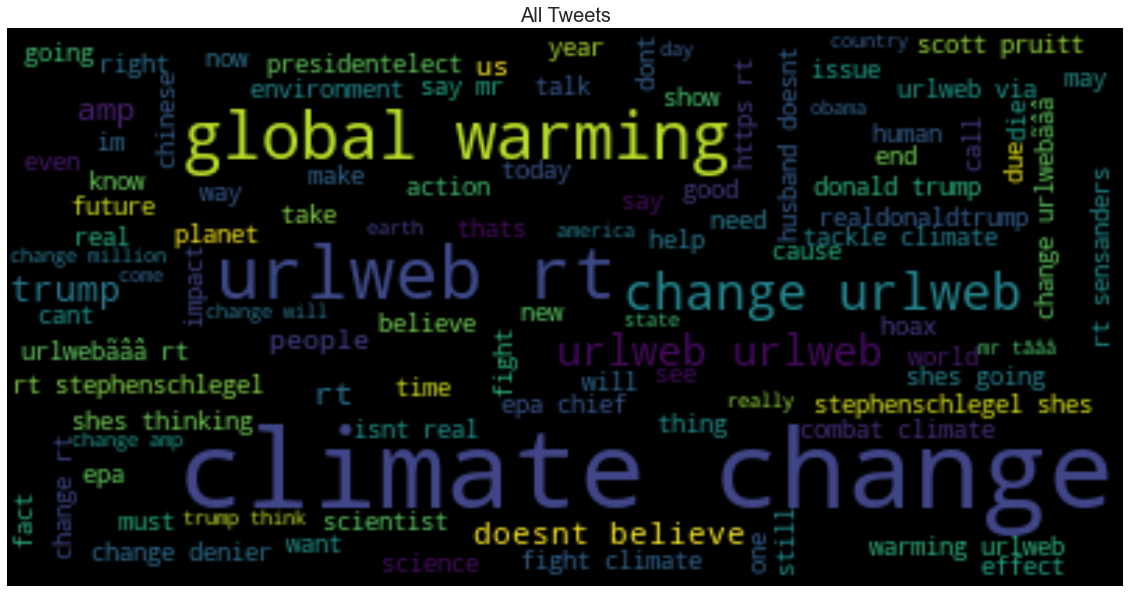

In [53]:
# Start with one review:
#looping through each category of the tweet and joining it as a string
tweet_All = " ".join(review for review in df.tweets)


fig, ax = plt.subplots(figsize  = (20,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=40, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=20)
ax.axis('off')


After cleaning the data the wordcloud looks a lot better without the `http` appearing in it.

 <a id="four"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In this Section we will be applying feature engineering to our dataset, we will try to enrich the dataset and if possible add some new features.

First we will start with **tokenization** Converting a sentence into list of words

In [54]:
#applying tokenization to the data set
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['tweets'].apply(tokeniser.tokenize)

In [55]:
#applying Lammetization
lemmatizer = WordNetLemmatizer()

In [56]:
#function that handles the process of lemmatization
def extract_lemma(words, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in words])   

In [57]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]  ##Notice the use of text.

In [60]:
#calling extract_lemma function on the tokens column
df['lemma'] = df['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [61]:
#using countVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word', ngram_range=(1, 1))

In [62]:
X_count = vectorizer.fit_transform(df['lemma'].values.astype(str))

In [63]:
X_count

<15819x22454 sparse matrix of type '<class 'numpy.int64'>'
	with 179571 stored elements in Compressed Sparse Row format>

In [64]:
# Extraxt features to help predict the label 
X = X_count

In [65]:
X_count.shape

(15819, 22454)

In [66]:
#pickling the vectorizer of deployment
pickle.dump(vectorizer, open("vector.pkl", "wb"))

In [68]:
# Determine our Label
y = train['sentiment']

#### Balancing the labels

In this Section, we will be applying a balancing technique to labels to see if it will improve the model performance since the labels appear to be unbalanced

In [69]:
#selecting the unique labels
type_labels = list(train['sentiment'].unique())
type_labels

[1, 2, 0, -1]

In [70]:
#selecting the size of the labels
heights = list(train['sentiment'].value_counts())
heights

[8530, 3640, 2353, 1296]

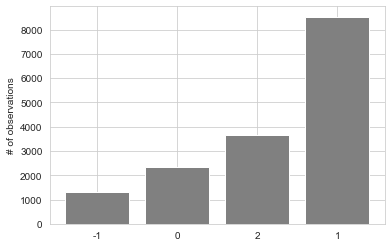

In [71]:
#ploting the unbalanced data
heights = list(train['sentiment'].value_counts())
bars = pd.DataFrame(zip(heights,type_labels), columns=['heights','labels'])
bars = bars.sort_values(by='heights',ascending=True)
plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.xticks(range(len(bars)),bars['labels'])
plt.ylabel("# of observations")
plt.show()

In [89]:
#selcting a class size which is roughly half the size of the largest size
class_size =4000

In [83]:
X = X_count.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
# Determine our Label
y = train['sentiment']

In [85]:
# concatenate both features and labels before resampling
data = np.concatenate([X, y[:,np.newaxis]], axis=1)
data

<ipython-input-85-2b8f30d94ece>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data = np.concatenate([X, y[:,np.newaxis]], axis=1)


array([[ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [90]:
#setting the index of the dataframe as labels
bar_label_df = bars.set_index('labels')
bar_label_df

,heights
labels,
-1,1296
0,2353
2,3640
1,8530


In [91]:
bar_label_df.loc[-1]

heights    1296
Name: -1, dtype: int64

## TEST DATA PREPROCESSING

All the preprocessing steps which were applied on the training data will also be applied on the test data. 

In [96]:
#creating a test dataframe
test_df = pd.DataFrame(test[['tweetid', 'message']])

In [97]:
#removing http and replacing it with url pattern
test_df['message_punct'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [99]:
#applying the remove punctuation funtion to the test data
test_df['message_punct'] = test_df['message_punct'].apply(lambda x: remove_punct(x))
df.head()

,tweetid,message,message_punct,tweets,tokens,lemma
0,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,126103,It's not like we lack evidence of anthropogeni...,Its not like we lack evidence of anthropogenic...,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...",it not like we lack evidence of anthropogenic ...
2,698562,RT @RawStory: Researchers say we have three ye...,RT RawStory Researchers say we have three year...,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...",rt rawstory researcher say we have three year ...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,TodayinMaker WIRED was a pivotal year in the...,todayinmaker wired was pivotal year in the war...,"[todayinmaker, wired, was, pivotal, year, in, ...",todayinmaker wired wa pivotal year in the war ...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",RT SoyNovioDeTodas Its and a racist sexist cl...,rt soynoviodetodas its and racist sexist clima...,"[rt, soynoviodetodas, its, and, racist, sexist...",rt soynoviodetodas it and racist sexist climat...


In [100]:
#apply the clean_data function
test_df['tweets'] = test_df['message_punct'].apply(clean_data)

In [101]:
#applying tokenizer
test_df['tokens'] = test_df['tweets'].apply(tokeniser.tokenize)

In [102]:
#applying the extract_lemma function
test_df['lemma'] = test_df['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [103]:
#transforming the data using vectorizer
test_count = vectorizer.transform(test_df['lemma'].values.astype(str))

In [1]:
#pip install yellowbrick
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Pythom' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import SMOTE
from sklearn.svm import LinearSVC
from collections import Counter

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

In [6]:
vectorizer = CountVectorizer(max_features= 8000, min_df = 2, max_df = 0.6)
# fit the model for training data
X_train_data = vectorizer.fit_transform(X_train)
X_train_data.shape

NameError: name 'X_train' is not defined

 <a id="five"></a>
## 5. Modeling
<a href=#cont>Back to Table of Contents</a>

In this Section, we will be implementing mulitple Machine Learning model on our countvectorizer object to see the best performing model i.e The model which gives the highest `F1_Score`.

In [84]:
svc = SVC(kernel='linear', gamma='auto')
f_clf = RandomForestClassifier(random_state=0)
nv_clf = MultinomialNB()
lg_clf = LogisticRegression(random_state = 0)

In [85]:
#fitting the models 
svc.fit(X_train, y_train)
f_clf.fit(X_train, y_train)
nv_clf.fit(X_train, y_train)
lg_clf.fit(X_train, y_train)

C:\Users\FRANK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [86]:
#fitting model with resampled lables
lg_clf.fit(X_train, y_train)

C:\Users\FRANK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

 <a id="six"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

The models have been trained and their respective performances would be checked on the test data set to evaluate the best performing model based on the designated f1_score metric.

### Resampled Data Model Performances

In [87]:
#model preformance with resampled labels
y_pred_resampled = lg_clf.predict(X_test)
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

          -1       0.75      0.42      0.53       325
           0       0.60      0.45      0.51       589
           1       0.76      0.85      0.80      2134
           2       0.73      0.75      0.74       907

    accuracy                           0.73      3955
   macro avg       0.71      0.62      0.65      3955
weighted avg       0.73      0.73      0.72      3955



The above classification report show's the performance of the model with the resampled labels, well the f1_score of the model here appears to be high, only the one class out of the four class labels has an f1_score of less than `80` which is the class with the highest sample size before resampling was appied, after testing the model with an unseen data the performance of the was not good, this shows that the model is either overfiting the data, the model is bayes or it contains noisy data.

**Note:** That's the reason why we decided to use use the data without resampling, below is the performance of the model without resampling the data

In [88]:
# Evaluate trained model using the test set
# Generate predictions
y_svc = svc.predict(X_test)
y_forest = f_clf.predict(X_test)
y_naive = nv_clf.predict(X_test)
y_pred = lg_clf.predict(X_test)

Next, we will be printing the classification report of the models to see the performance of the models 

In [89]:
#classification report of the models
print("Logistic Regression Model")
print(classification_report(y_test, y_pred))
print("RamdonForest Model")
print(classification_report(y_test, y_forest))
print("MultinomiaNB Naive Model")
print(classification_report(y_test, y_naive))
print("SVC Model")
print(classification_report(y_test, y_svc))

Logistic Regression Model
              precision    recall  f1-score   support

          -1       0.75      0.42      0.53       325
           0       0.60      0.45      0.51       589
           1       0.76      0.85      0.80      2134
           2       0.73      0.75      0.74       907

    accuracy                           0.73      3955
   macro avg       0.71      0.62      0.65      3955
weighted avg       0.73      0.73      0.72      3955

RamdonForest Model
              precision    recall  f1-score   support

          -1       0.64      0.27      0.38       325
           0       0.60      0.39      0.47       589
           1       0.71      0.89      0.79      2134
           2       0.79      0.66      0.72       907

    accuracy                           0.71      3955
   macro avg       0.68      0.55      0.59      3955
weighted avg       0.71      0.71      0.69      3955

MultinomiaNB Naive Model
              precision    recall  f1-score   support

     

In [90]:
#F1_score of the models
f1_logistic = f1_score(y_test, y_pred, average = 'weighted')
f1_svc = f1_score(y_test, y_svc, average = 'weighted')
f1_Random = f1_score(y_test, y_forest, average = 'weighted')
f1_naive = f1_score(y_test, y_naive, average = 'weighted')

In [91]:
#creating a dataframe for the f1_scores
f1_score = {'Models': ['Logistic Regression', 'SVC model', 'RandomForest Model', 'naive Model'],
           'F1_score': [f1_logistic, f1_svc, f1_Random, f1_naive] }
f1_scores = pd.DataFrame(f1_score)
f1_scores.head()

,Models,F1_score
0,Logistic Regression,0.724646
1,SVC model,0.718713
2,RandomForest Model,0.693750
3,naive Model,0.672010


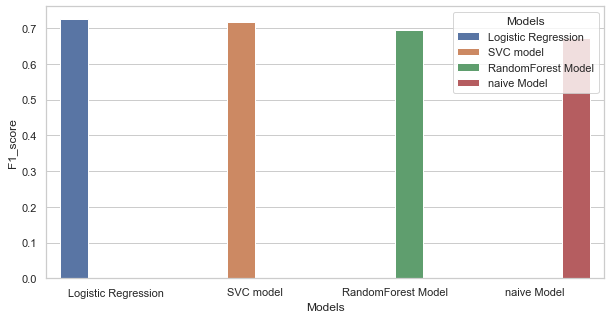

In [92]:
#ploting the f1_scores of the models
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="Models", y='F1_score', hue='Models', data=f1_scores)
#plt.tight_layout()
plt.show()

The above plot shows the `F1_score` of all the different models side by side, `Logistic Regression` with highest F1_score and `MultinomialNB naive` with the lowest.

We will also take a look at another metric known as **confusion matrix**, which can also be used to evaluate a model's performance.

In [93]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [94]:
# Creating a dataframe for an array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1','2'], 
                     columns = ['-1','0','1','2'])

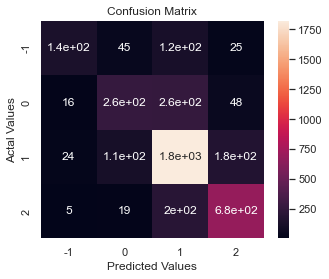

In [95]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

We can see the logistic Regression model performance based on the above confusion matrix

Next, we will make submissions on kaggle by testing our trained model on the test data set using the best performing model based on it's `F1_score`.

In [96]:
#making prediction
prediction = lg_clf.predict(x_test)

In [97]:
#creating a dataframe for the submission
submission = pd.DataFrame(list(zip(test['tweetid'],  prediction)), columns = ['tweetid', 'sentiment'])
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [98]:
#saving the file as csv
submission.to_csv('submission_v8.csv', index_label = False, index = False)

In [99]:
#pickling the model for deployment
model_save_path = "forest_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(f_clf, file)

## Comet_ml

In this Section we will be using comet_ml for our model version control

In [3]:
#install comet
!pip install comet_ml

In [105]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="xWEwy88RgKmgKY9IfPYYxgKtD",
    project_name="Advance Classification Team_ZF3",
    workspace="franknero20",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/franknero20/advance-classification-team-zf3/ce78ccbbd9d844e4921bf599db5f7eb8



In [106]:
#the f1_score, precision and recall of the model
f1 = f1_score(y_test, y_pred, average = 'weighted')
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

TypeError: 'dict' object is not callable

In [107]:
# Create dictionaries for the data we want to log
params = {
          "random_state": 0,
          "model_type": "logistic Regression",
          "stratify": True 
}
metrics = {
        "f1_score": f1,
        "precision_score": precision,
        "recall_score": recall 
}

NameError: name 'f1' is not defined

In [ ]:
#logging the experiment to comet_ml
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
#ending the experiment
#experiment.end

 <a id="seven"></a>
## 7. Model Explanations
<a href=#cont>Back to Table of Contents</a>

After applying the trained Machine Learning Models on the test data, we found the Logistic Regression model to be the overall best performing model among all other models trained. Some models like the `SVC`, `RamdomForest` and the `MultinomialNB Model` were  implemented,and were also found to have good performance.

The Logistic Regression model came out with the highest `F1_score` 

###  Conclusion

We went through multiple stages of data cleaning and feature engineering to improve the data, train a Machine Learning Model and arrive at a model with a good performance to better predict unseen data coming from the outside world.

- we also applied resampling technique to labels but it did not improve the model performance.

We noticed that the model with the best performance came from the unbalanced label set. Balancing the labels had little or no effect on the model's performance. 